**Context**

Data, evidence, and science are critical if government is to address so many imminent threats: pandemics, climate change and coastal inundation, Alzheimer’s disease, child hunger, biodiversity, among others. Yet much of the information about data needed to inform evidence and science is locked inside publications.

The Coleridge Initiative is launching a new competition, Show Us the Data, to spur the use of artificial intelligence (AI) to unlock this information. Westat is among the sponsors of this exciting competition. Participants are challenged to use natural language processing (NLP) to identify critical datasets used in scientific publications. This work will help researchers quickly find the data they need to do their work. The effort will help improve access and use of critical datasets.

**Challenge** - Much of the information about data necessary to inform evidence and science is locked inside publications.

**Approach** - lets leverage natural language processing find the hidden-in-plain-sight data citations.

Basically In this competition, we will use natural language processing (NLP) to automate the discovery of how scientific data are referenced in publications.

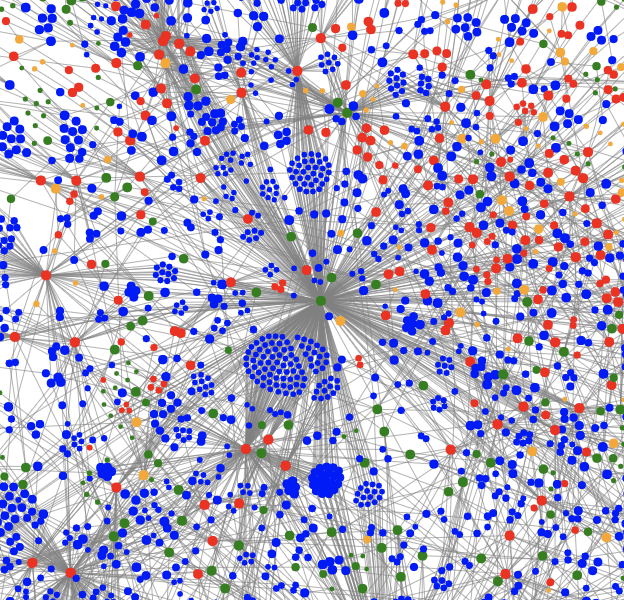

# Import Packages

In [ ]:
import os
import re
import json
import glob


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
%matplotlib inline


import string


import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
import json
import glob
os.listdir('/kaggle/input/coleridgeinitiative-show-us-the-data')

In [ ]:
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q wordcloud
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

In [ ]:
pip install top2vec[sentence_transformers]


In [ ]:
pip install top2vec[sentence_encoders]


In [ ]:

from copy import deepcopy
from top2vec import Top2Vec

# Load the data

# **Merge all the JSON files(Publications Corpus) to a Dataframe**

In [ ]:

#Path to Json Files
train_corpus =  glob.glob("../input/coleridgeinitiative-show-us-the-data/train/*.json")
test_corpus = glob.glob("../input/coleridgeinitiative-show-us-the-data/test/*.json")



In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
df_train = pd.DataFrame()
for count, x in enumerate(train_corpus, len(train_corpus)):
    df_train = pd.concat([df_train, pd.read_json(x)])
    
df_train.to_csv("df_train.csv", index = False)

df_train.head(2)

# **Test Corpus**

In [ ]:
df_test = pd.DataFrame()
for count, x in enumerate(test_corpus, len(test_corpus)):
    df_test = pd.concat([df_test, pd.read_json(x)])
    
df_test.to_csv("df_test.csv", index = False)

df_test.head(2)

#  Train Corpus Preprocessing

In [ ]:
def cleantext(df): 
    
    df_train['cleaned_text'] = df_train['text'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    df_train['cleaned_text'] = df_train['cleaned_text'].replace("  ", " ")
    
    # convert tweets to lowercase
    df_train['cleaned_text'] = df_train['cleaned_text'].str.lower()
    
     #remove_symbols
    df_train['cleaned_text']  = df_train['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_train['cleaned_text'] = df_train['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_train['cleaned_text']  = df_train['cleaned_text'].replace(r'https.*$', "", regex = True)
    
    #remove stopwords and words_to_remove
    
    mystopwords = set(stopwords.words('english'))
    
    df_train['fully_cleaned_text'] = df_train['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in mystopwords]))
    

    return df

df_train = cleantext(df_train)

In [ ]:
df_train.head(2)

# Top2Vec topic modeling with BERT


In [ ]:
docs = list(df_train.loc[:, "fully_cleaned_text"].values)


In [ ]:
docs[:5]


# Top2Vec

In [ ]:

model = Top2Vec(docs, embedding_model='universal-sentence-encoder')


In [ ]:
model.get_num_topics()


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(25)


In [ ]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)


# Search Documents by Topic

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=7, num_docs=5)


In [ ]:
documents

In [ ]:
#Semantic Similarties
document_scores

In [ ]:
document_ids

**For each of the returned documents we are going to print its content, score and document number**

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=7, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

# Semantic Search Documents by Keywords
#Search documents for content semantically similar to statisticians and classifications

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["statisticians", "classifications"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

# Similar Keywords

Search for similar words to pandemics.



In [ ]:
words, word_scores = model.similar_words(keywords=["pandemics"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

# work is in Progress, kindly upvote if you find it useful and comment for suggestions.